In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy.special import logsumexp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data[:,] 
y = iris.target

ModuleNotFoundError: No module named 'sklearn'

In [204]:
# Add intercept column
X_train = np.hstack((X,np.ones((X.shape[0],1))))

# Initialize random betas
num_feats = X_train.shape[1]
num_classes = len(np.unique(y))
init_b = np.random.normal(0,1,num_feats*num_classes).reshape((num_feats,num_classes))

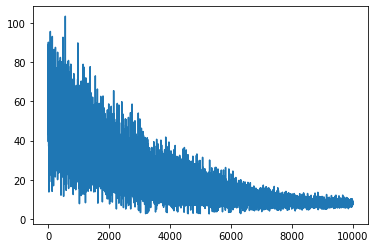

0.7466666666666667

In [205]:
'''
def softmax(z):
    exp = np.exp(z - np.max(z, axis = 1).reshape((-1,1)))
    sums = np.sum(exp, axis = 1).reshape((-1,1))
    return exp / sums
'''

def logsoftmax(z):
    sums = logsumexp(z, axis = 1).reshape((-1,1))
    logp = z - sums
    return logp

def pred(feats, b):
    return np.dot(feats,b)

def pred_binary(feats, b):
    yhat = pred(feats, b)
    return(np.argmax(yhat, axis = 1))



def compute_cost(feats, b, y):
    log_yhats = logsoftmax(pred(feats, b))
    cost = -1*np.sum(log_yhats[np.arange(log_yhats.shape[0]), y], axis = 0)
    return cost

def accuracy(y_pred, y):
    return np.mean(y_pred == y)

# Gradient in each dimension is sum(feats * (ind(y=k)-P(y=k)))
def perform_grad_descent(feats, b, y, eta, lam):
    yhats = np.exp(logsoftmax(pred(feats, b)))
    
    for k in range(yhats.shape[1]):
        indicators = (y == k).astype(int)
        grad = np.dot(feats.T, (yhats[:,k] - indicators).reshape((-1,1)))
        total_grad = np.sum(grad, axis = 0)
        b[:,k] -= eta*(total_grad + lam*b[:,k])
        
    return b

def train(X, b, y, epochs = 10000):
    costs = []

    for e in range(epochs):        
        # draw mini batches from x and y
        idx = np.random.choice(np.arange(len(X)), 10, replace = False)
        X_i, y_i = X[idx], y[idx]
        
        # Perform gradient descent
        b = perform_grad_descent(X_i, b, y_i, .000001, .00005)
        if epochs % 100 == 0:
            costs.append(compute_cost(X_i, b, y_i))
            
    return b, costs

# Train
b, costs = train(X_train, init_b, y)

# Plot training
plt.plot(costs)
plt.show()

## Generate predictions, accuracy
y_pred = pred_binary(X_train, b)
accuracy(y_pred, y)

In [122]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver = 'saga', multi_class = 'multinomial', max_iter = 50000)
logit.fit(X_train, y)
logit_pred = logit.predict(X_train)
accuracy(logit_pred, y)

0.9866666666666667